# Classification of garbage photos into 6 categories  
Useful imports:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # file handling
import cv2 #images

import matplotlib.pyplot as plt # graphs
%matplotlib inline 

from tqdm import tqdm # progress bar

## Reading files
The first step is to cycle the folders containing the images and saving them in the respective lists.  
One useful thing to do here is to resize the files in order to make them easier to work with.

In [2]:
trash = []
cardboard = []
plastic = []
metal = []
paper = []
glass = []
garbage = []

prova = []
for dirname, _, filenames in os.walk('D:/PROJECTS/AI projects/garbage-classification/Garbage classification'):
#     print(dirname)
    for filename in filenames:
        prova.append(os.path.join(dirname, filename))
# print(prova)
height = 192
width = 256

dim = (width, height)


for file in tqdm(prova):
    image = cv2.imread(file,1)
    res = cv2.resize(image, dim, interpolation = cv2.INTER_LINEAR)
    file = file.split("\\")
    
    cat = file[-2]
    if cat == 'trash':
        trash.append(res)
    if cat == 'plastic':
        plastic.append(res)
    if cat == 'glass':
        glass.append(res)
    if cat == 'paper':
        paper.append(res)
    if cat == 'metal':
        metal.append(res)
    if cat == 'cardboard':
        cardboard.append(res)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2527/2527 [00:10<00:00, 243.56it/s]


Once we have the 6 lists we create the merged dataset joining them, and we create the target columns containing the correct label for each of the images.

In [3]:
garbage = trash + plastic + glass + paper + metal + cardboard
target = [0 for item in trash] + [1 for item in plastic]+[2 for item in glass]+[3 for item in paper]+[4 for item in metal]+[5 for item in cardboard]
print("Total images:",len(garbage))
print("Total labels:",len(target))

Total images: 2527
Total labels: 2527


We can now preview one of the images to see what we're working with.

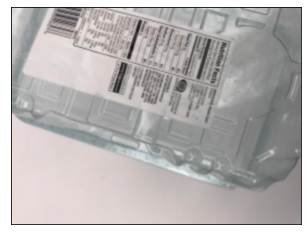

In [4]:
plt.imshow(garbage[300], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [5]:
target[301]

1

## shuffling and splitting dataset for training and testing

In [6]:
import random

random.seed(42)

random.shuffle(garbage)
random.shuffle(target)
garbage=np.array(garbage)
target = np.array(target)
len(garbage[0][0][0])

3

In [7]:
x_train, x_test = garbage[:2000], garbage[2000:]
y_train, y_test = target[:2000], target[2000:]

In [8]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Using TensorFlow backend.


In [9]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 1.]


In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train.shape

(2000, 192, 256, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (5,5),activation="relu", input_shape=(192, 256, 3)))

model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=5, validation_split=0.3 )

Train on 1400 samples, validate on 600 samples
Epoch 1/5
